# Домашнее задание по теме «Работа с переменными» обновленное

## Задание

**Цель:** изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.

**Описание задания:**
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) . Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).

Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации:
- на основе всех неизмененных признаков;
- на основе признаков, отобранных по значениям корреляций;
- на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них.
- Должны быть выведены метрики RMSE, R2 моделей.
- Желательно добиться улучшения метрик.

## Этапы работы:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

### 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [6]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [7]:
y.isna().sum()

0

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

### 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [10]:
model= make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [11]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [12]:
r2_score(y_train, y_train_pred)

0.6107251613176828

In [13]:
y_test_pred = model.predict(X_test)
r2_score(y_test, y_test_pred)

0.5882336691134313

In [14]:
mean_squared_error(y_train, y_train_pred, squared=False)

0.7166977119179887

In [15]:
mean_squared_error(y_test, y_test_pred, squared=False)

0.7535823975283861

### 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

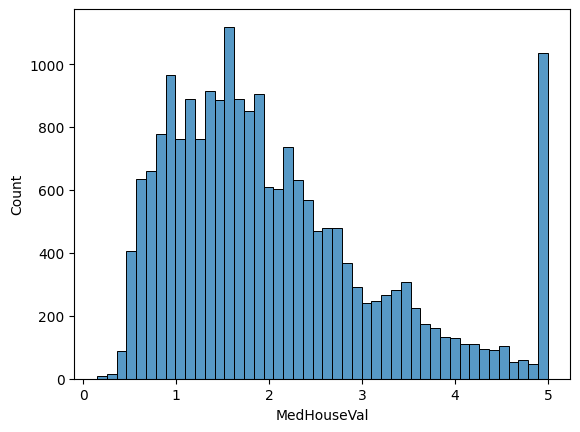

In [16]:
sns.histplot(y)
plt.show()

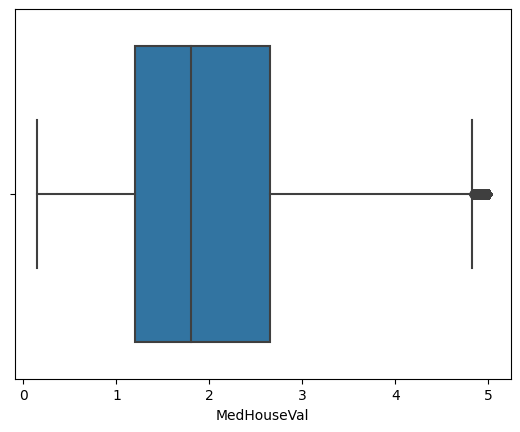

In [17]:
sns.boxplot(x = y)
plt.show()

#### Выбросы присутствуют

### 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.  
a. Сделайте выводы.  
b. Удалите признаки на основании полученных значений, выводов.  
c. Повторите п. 3, п. 4 на измененных данных.  


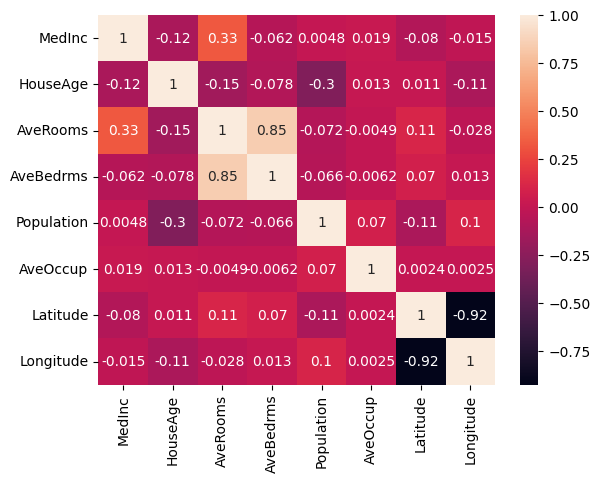

In [18]:
sns.heatmap(X.corr(), annot=True)
plt.show()

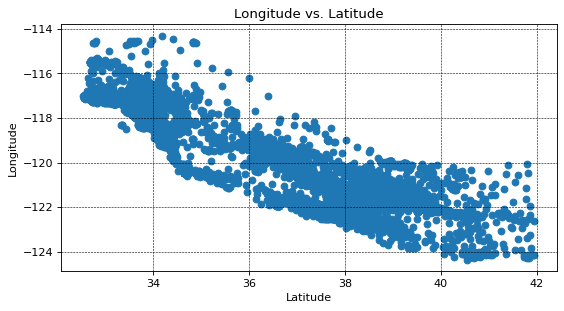

In [19]:
plt.figure(figsize=(8, 4), dpi=80)
plt.scatter(X['Latitude'],X['Longitude'])
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Longitude vs. Latitude')
plt.show()

### **Выводы:**
1. Присутствует сильная положительная корреляция между количеством комнат и количеством спален, что логично, поэтому удаляем признак с количеством спален, чтобы избавиться от мультиколлинеарности..
2. Присутствует сильная отрицательная корреляция между широтой и долготой, что говорит о том, что выборка блоков расположена по диагонали на карте, когда, например, долгота возрастает - широта уменьшается или наоборот. Выше подтверждающий график. Признак оставляем.
3. Присутствует ниже средней положительная корреляция между медианным доходом в блоках со медианным возрастом домов, что, возможно, говорит о том, что люди, купив дом и проживая в нём какое-то время, также начинают получать более высокую зарплату со временем. Гипотеза требует дополнительной информации для подтверждения. Признак оставляем.
4. Присутствует ниже средней отрицательная корреляция между медианным возрастом домов и населением блоков, что, возможно, связано с тем, что вырастают дети и уезжают в колледжи и университеты. Также признак оставляем.

In [20]:
del X['AveBedrms']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [22]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [23]:
r2_score(y_train, y_train_pred)

0.600356469429326

In [24]:
y_test_pred = model.predict(X_test)
r2_score(y_test, y_test_pred)

0.5795604715012044

In [25]:
mean_squared_error(y_train, y_train_pred, squared=False)

0.7261799349581379

In [26]:
mean_squared_error(y_test, y_test_pred, squared=False)

0.7614775420644568

##### Результаты чуть ухудшились.

### 7. Исследуйте оставленные признаки на выбросы.  
a. Удалите выбросы в случае обнаружения.  
b. Повторите п. 3, п. 4 на измененных данных.

In [27]:
sns.set(rc={'figure.figsize':(10,1)})
sns.set_style(style = 'dark')
sns.set(font_scale=1)

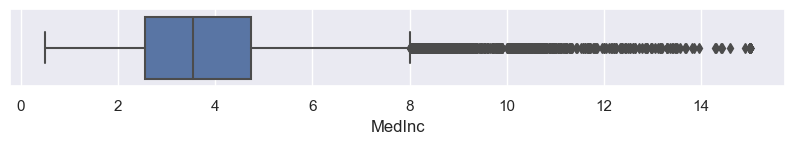

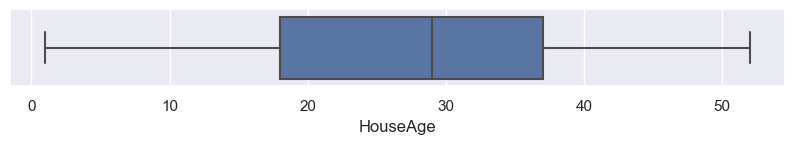

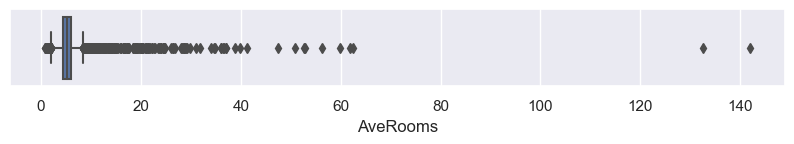

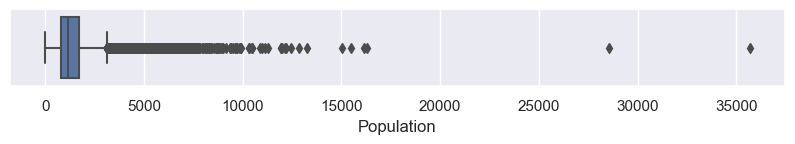

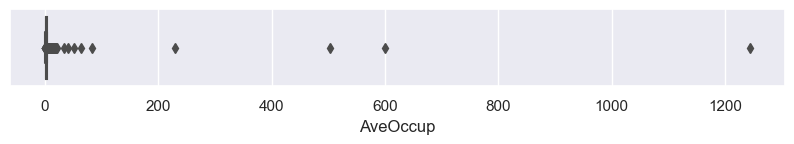

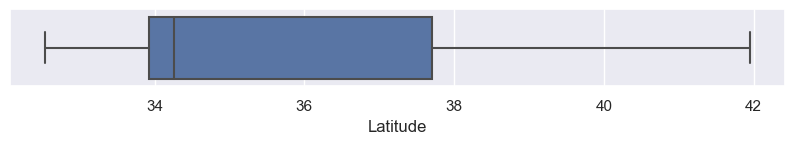

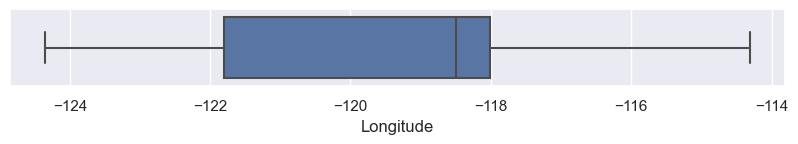

In [28]:
for i in X.columns.to_list():
    sns.boxplot(x = X[i])
    plt.show()

##### Поскольку будем удалять строки с выбросами, то необходимо удалять соответствующие строки с целевой переменной, поэтому объединяем и далее для удобства работаем по всем признакам, хотя как видно выше по части признаков выбросов нет.

In [29]:
data = pd.concat([X,y], axis=1) # for further manipulations

In [30]:
data.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [31]:
data_stat = data.describe()

#### **Далее:**
1. Определяем верхние и нижние границы боксплотов по каждому признаку.
2. Удалаем последовательно строки, там где по какому-то признаку есть выброс.

In [32]:
# Расчётные границы боксплотов без учёта максимальных и минимальных значений признаков
max_range = data_stat.iloc[6]+1.5*(data_stat.iloc[6]-data_stat.iloc[4])
min_range = data_stat.iloc[4]-1.5*(data_stat.iloc[6]-data_stat.iloc[4])

In [33]:
# Реальные верхние и нижние границы боксплотов с учётом максимальных и минимальных значений признаков
boxplot_max, boxplot_min = [],[]
for i in range(len(max_range)):
    boxplot_max.append(min(data_stat.iloc[7][i], max_range[i]))
    boxplot_min.append(max(data_stat.iloc[3][i], min_range[i]))

In [34]:
boxplot_max

[8.013024999999999,
 52.0,
 8.469878027106942,
 3132.0,
 4.5610405893536905,
 41.95,
 -114.31,
 4.824124999999999]

In [35]:
# Убираем выбросы. 
data = data.query('MedInc<=@boxplot_max[0] & MedInc>=@boxplot_min[0]')
data = data.query('HouseAge<=@boxplot_max[1] & HouseAge>=@boxplot_min[1]')
data = data.query('AveRooms<=@boxplot_max[2] & AveRooms>=@boxplot_min[2]')
data = data.query('Population<=@boxplot_max[3] & Population>=@boxplot_min[3]')
data = data.query('AveOccup<=@boxplot_max[4] & AveOccup>=@boxplot_min[4]')
data = data.query('Latitude<=@boxplot_max[5] & Latitude>=@boxplot_min[5]')
data = data.query('Longitude<=@boxplot_max[6] & Longitude>=@boxplot_min[6]')
data = data.query('MedHouseVal<=@boxplot_max[7] & MedHouseVal>=@boxplot_min[7]')
# НЕ ПРИДУМАЛ КАК ЭТО СДЕЛАТЬ БОЛЕЕ ЛАКОНИЧНО В PYTHON. МОЖЕТЕ ПОДСКАЗАТЬ?

In [36]:
data = data.reset_index(drop=True)

In [37]:
data.info() # удалилось около 3000 строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17249 entries, 0 to 17248
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       17249 non-null  float64
 1   HouseAge     17249 non-null  float64
 2   AveRooms     17249 non-null  float64
 3   Population   17249 non-null  float64
 4   AveOccup     17249 non-null  float64
 5   Latitude     17249 non-null  float64
 6   Longitude    17249 non-null  float64
 7   MedHouseVal  17249 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [38]:
X = data.iloc[:,0:7]

In [39]:
X.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24
1,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25
2,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25
3,4.0368,52.0,4.761658,413.0,2.139896,37.85,-122.25
4,3.6591,52.0,4.931907,1094.0,2.128405,37.84,-122.25


In [40]:
y = data.iloc[:,7:8]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [42]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [43]:
r2_score(y_train, y_train_pred)

0.6240376816770306

In [44]:
y_test_pred = model.predict(X_test)
r2_score(y_test, y_test_pred)

0.634668068147884

In [45]:
mean_squared_error(y_train, y_train_pred, squared=False)

0.5829151305150103

In [46]:
mean_squared_error(y_test, y_test_pred, squared=False)

0.5663900389008729

### Результаты немного улучшились

### 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.

##### **Введём новые переменные:**
1. Среднее количество комнат, делённое на количество людей, и от этих величин возьмём логарифм, поскольку значения будут очень маленькими.
2. Произведение Дохода на Количество комнат.
3. Квадрат от Дохода.

In [47]:
data['Rooms_per_Population'] = np.log(data['AveRooms']/data['Population'])

In [48]:
data['InxXRooms'] = data['MedInc']*data['AveRooms']

In [49]:
data['2MedInc']=data['MedInc']**2

In [50]:
data.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Rooms_per_Population,InxXRooms,2MedInc
0,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521,-4.091751,60.150315,52.669855
1,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413,-4.563514,32.827897,31.844578
2,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422,-4.499161,24.161264,14.793254
3,4.0368,52.0,4.761658,413.0,2.139896,37.85,-122.25,2.697,-4.462852,19.221861,16.295754
4,3.6591,52.0,4.931907,1094.0,2.128405,37.84,-122.25,2.992,-5.401870,18.046339,13.389013


In [51]:
X = data.iloc[:,[0,1,2,3,4,5,6,8,9,10]]

In [52]:
X.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Rooms_per_Population,InxXRooms,2MedInc
0,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,-4.091751,60.150315,52.669855
1,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,-4.563514,32.827897,31.844578
2,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,-4.499161,24.161264,14.793254
3,4.0368,52.0,4.761658,413.0,2.139896,37.85,-122.25,-4.462852,19.221861,16.295754
4,3.6591,52.0,4.931907,1094.0,2.128405,37.84,-122.25,-5.401870,18.046339,13.389013


In [53]:
y = data.iloc[:,7]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [55]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

In [56]:
r2_score(y_train, y_train_pred)

0.6294631795057144

In [57]:
y_test_pred = model.predict(X_test)
r2_score(y_test, y_test_pred)

0.6369029539572107

In [58]:
mean_squared_error(y_train, y_train_pred, squared=False)

0.5786938328542159

In [59]:
mean_squared_error(y_test, y_test_pred, squared=False)

0.5646549607774168

##### В целом, есть совсем небольшое улучшение.

### 9. Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.\
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований.\
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

##### **а. Было протестировано 4 модели:**
1. Модель с датасетом как есть.
2. Модель с датасетом с удалённой колонкой, где была сильная корреляция.
3. Модель с удалённой колонкой и удалёнными выбросами за пределами боксплотов.
4. Модель с удалённой колокной, удалёнными выбросами и добавленно искусственно 3 новыми признаками, сделанными из модели 3.

##### **b. Было протестировано 4 модели:**
|Model|R2_train|R2_test|RMSE_train|RMSE_test|Features|
|:-----:|:----:|:--:|:--------:|:---:|:-------|
|1|0.6107|0.5882|0.7167|0.7536|All features, no changes|
|2|0.6004|0.5796|0.7262|0.7615|All features w/o AveBedrms|
|3|0.6240|0.6347|0.5829|0.5664|As above w/o outliers|
|4|0.6295|0.6369|0.5787|0.5647|As above with new 4 artificial variables|

##### c. Несмотря на небольшое улучшение качества моделей после преобразований, в целом, даже лучшие модели не справились со своей задачей. Приемлемым показателем могло бы являться значение R**2 выше 0.8. 
**Вывод:** или влияние переменных должно быть проанализировано глубже или не хватает дополнительных переменных. 

Также, во время выборочного исследования долготы и широты, в частности, было обнаружено, что некоторые значения определяли местонахождение блоков в Тихом океане, что говорит также о низком качестве данных. Поскольку не было способа удалить программно такие значение, то пришлось работать со всеми данными.